In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2  
from PIL import Image, ImageEnhance
import colorsys

In [3]:
from os import chdir as cd

In [5]:
# Path to drive --> Traffic Light
cd('/content/drive/MyDrive/Traffic_Light/Images-Labels_done')
!pwd

/content/drive/MyDrive/Traffic_Light/Images-Labels_done


#Data Augmentation


##Load image: Image & OpenCV

In [6]:
#img in format RGB
img = Image.open('IMG-499.jpg')

#img_cv in format BGR
img_cv = cv2.imread('IMG-499.jpg')

##Flip left to right - Image

In [7]:
horiz = img.transpose(method=Image.FLIP_LEFT_RIGHT)

##Rotation - Image

In [8]:
rotate = img.rotate(10)

##Reversing - OpenCV

In [9]:
hsv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
rev_h = 180 - h
rev_hsv = cv2.merge([rev_h, s, v])
rev_img = cv2.cvtColor(rev_hsv, cv2.COLOR_HSV2BGR)

##Color shift - OpenCV

In [10]:
hsv_ = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)
h_, s_, v_ = cv2.split(hsv_)
shift_h = (h + 90) % 180
shift_hsv = cv2.merge([shift_h, s, v])
shift_img = cv2.cvtColor(shift_hsv, cv2.COLOR_HSV2BGR)

##Blur - OpenCV

In [11]:
gaussian = cv2.GaussianBlur(img_cv, (7, 7), 0)

median = cv2.medianBlur(img_cv, 5)

bilateral = cv2.bilateralFilter(img_cv, 9, 75, 75)

##Noise addition - OpenCV

In [16]:
def add_gaussian_noise(img_):
    img_ = img_ [...,::-1]/255.0
    noise =  np.random.normal(loc=0, scale=1, size=img_.shape)
    noisy2mul = np.clip((img_*(1 + noise*0.2)),0,1)
    # [...,::-1] reverse format color
    return noisy2mul

In [17]:
gaussian_noise = add_gaussian_noise(img_cv)

##Transitional - OpenCV

In [19]:
M = np.float32([
	[1, 0, -150],
	[0, 1, 50]
])

shifted = cv2.warpAffine(img_cv, M, (img_cv.shape[1], img_cv.shape[0]))

##Brightnen and Darken - Image

In [18]:
enhancer = ImageEnhance.Brightness(horiz)

factor = 1.5 #brightens the image
brightness = enhancer.enhance(factor)

factor = 0.88 #darkens the image
darker = enhancer.enhance(factor)

##Hue - Image

In [20]:
rgb_to_hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv_to_rgb = np.vectorize(colorsys.hsv_to_rgb)

def shift_hue(arr, hout):
    r, g, b, a = np.rollaxis(arr, axis=-1)
    h, s, v = rgb_to_hsv(r, g, b)
    h = hout
    r, g, b = hsv_to_rgb(h, s, v)
    arr = np.dstack((r, g, b, a))
    return arr

def colorize(im, hue):
    """
    Colorize PIL image `original` with the given
    `hue` (hue within 0-360); returns another PIL image.
    """
    img = im.convert('RGBA')
    arr = np.array(np.asarray(img).astype('float'))
    new_img = Image.fromarray(shift_hue(arr, hue/360.).astype('uint8'), 'RGBA')

    return new_img

In [21]:
hue = colorize(img, 10)

##Contrast - OpenCV

In [22]:
# define the alpha and beta
alpha = 1.5 # Contrast control
beta = 10 # Brightness control

# call convertScaleAbs function
contrast = cv2.convertScaleAbs(img_cv, alpha=alpha, beta=beta)

##Show images

Text(0.5, 1.0, 'Contrast')

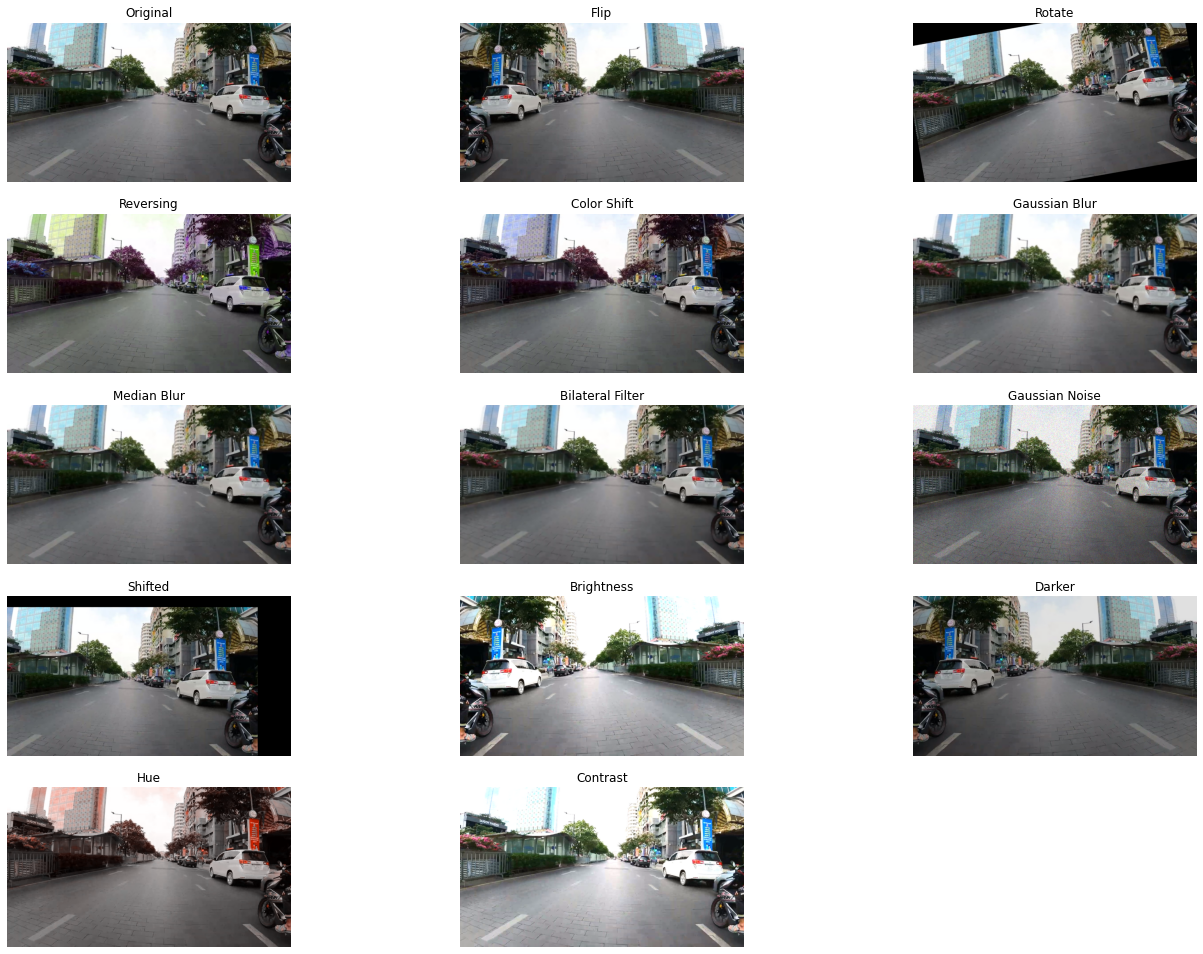

In [23]:
rows = 5
columns = 3

fig = plt.figure(figsize=(23, 17))

fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img)
plt.axis('off')
plt.title("Original")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(horiz)
plt.axis('off')
plt.title("Flip")

fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(rotate)
plt.axis('off')
plt.title("Rotate")

fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(rev_img)
plt.axis('off')
plt.title("Reversing")

fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(shift_img)
plt.axis('off')
plt.title("Color Shift")

fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Gaussian Blur")

fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Median Blur")

fig.add_subplot(rows, columns, 8)
  
# showing image
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Bilateral Filter")

fig.add_subplot(rows, columns, 9)
  
# showing image
plt.imshow(gaussian_noise)
plt.axis('off')
plt.title("Gaussian Noise")

fig.add_subplot(rows, columns, 10)
  
# showing image
plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Shifted")

fig.add_subplot(rows, columns, 11)
  
# showing image
plt.imshow(brightness)
plt.axis('off')
plt.title("Brightness")

fig.add_subplot(rows, columns, 12)
  
# showing image
plt.imshow(darker)
plt.axis('off')
plt.title("Darker")

fig.add_subplot(rows, columns, 13)
  
# showing image
plt.imshow(hue)
plt.axis('off')
plt.title("Hue")

fig.add_subplot(rows, columns, 14)
  
# showing image
plt.imshow(cv2.cvtColor(contrast, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Contrast")

##Work with path


In [ ]:
cd('/content/drive/MyDrive/Traffic_Light')
!pwd

/content/drive/MyDrive/Traffic_Light


###Split filename


In [ ]:
import re

# img = []
# for x in os.listdir('Image_In_VN'):
#   img.append(x)
# delimiters = "-", "."
# regex_pattern = '|'.join(map(re.escape, delimiters))
# held_str = re.split(regex_pattern, img[-1])
# print(held_str[1])

def split_filename():
  img = []
  held_str = []
  for x in os.listdir('Image_In_VN'):
    img.append(x)
  
  delimiters = "-", "."
  regex_pattern = '|'.join(map(re.escape, delimiters))
  for im in img:
    held_str.append(re.split(regex_pattern, im))
        
  return [held_str[i][1] for i in range(0,652)]

In [ ]:
print(split_filename())

['408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449', '450', '451', '452', '453', '454', '456', '457', '458', '459', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '470', '471', '473', '474', '475', '476', '477', '478', '479', '480', '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496', '497', '498', '499', '500', '501', '502', '472', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '528', '532', '539', '530', '519', '535', '540', '537', '534', '523', '526', '531', '529', '522', '521', '520', '524', '525', '527', '536', '533', '538', '541', '548', '549', '543', '546', '547', '542', '545', '544', '552', '572'

###Get num of file name and Sort 


In [ ]:
cd('/content/drive/MyDrive/Traffic_Light')

In [ ]:

entries = os.listdir('/content/drive/MyDrive/Traffic_Light/Image_In_VN/')

string = split_filename()

# string.remove('nb_')
# entries.remove('.ipynb_checkpoints')

array_int = [eval(num) for num in string]

index = np.arange(start=408, stop=503, step=1, dtype=int)

array_int.sort()
# print("Array of integer:\n",array_int)

missing_elements = [item for item in range(array_int[0], array_int[-1] + 1) if item not in array_int]

print("Missing value in array of integer:\n",missing_elements)
print("Length of missing_elements:\n",len(missing_elements))
# print("Length of array_int:\n",len(array_int))
print(len(string))
print(len(entries))

print(index)
print(len(index))

Missing value in array of integer:
 [640, 642, 644, 646, 648, 650, 652, 654, 656, 658, 660, 662, 664, 666, 668, 670, 672, 674, 676, 678, 680, 682, 684, 686, 688, 690, 692, 694, 696, 698, 700, 702, 704, 706, 708, 710, 712, 714, 716, 718, 720, 722, 724, 726, 728, 730, 732, 734, 736, 738, 740, 742, 744, 746, 748, 750, 752, 754, 756, 758, 760, 762, 764, 766, 768, 770, 772, 774, 776, 778, 780, 782, 784, 786, 788, 790, 792, 794, 796, 798, 800, 802, 804, 806, 808, 810, 812, 814, 816, 818, 820, 822, 824, 826, 828, 830, 832, 834, 836, 838, 840, 842, 844, 846, 848, 850, 852, 854, 856, 858, 860, 862, 864, 866, 868, 870, 872, 874, 876, 878, 880, 882, 884, 886, 888, 890, 892, 894, 896, 898, 900, 902, 904, 906, 908, 910, 912, 914, 916, 918, 920, 922, 924, 926, 928, 930, 932, 934, 936, 938, 940, 942, 944, 946, 948, 950, 952, 954, 956, 958, 960, 962, 964, 966, 968, 970, 972, 974, 976, 978, 980, 982, 984, 986, 988, 990, 992, 994, 996, 998, 1000, 1002, 1004, 1006, 1008, 1010, 1012, 1014, 1016, 1018, 102

In [ ]:
print(array_int[-1])
print(index[0])

1477
408


###Rename image with path

In [ ]:
cd('/content/drive/MyDrive/Traffic_Light/Image_In_VN')

In [ ]:
# filenames = []
# for x in os.listdir('Image_In_VN'):
#   filenames.append(x)
# print(filenames)

root = '/content/drive/MyDrive/Traffic_Light/Image_In_VN/'
prefix = 'IMG-'
suffix = '.jpg'

elements = np.arange(start=408, stop=640, step=1, dtype=int)

# Get directory name
# for path, sub_directories, files in os.walk(root):
#     directory_name = os.path.basename(os.path.dirname(path))
#     print(directory_name)

# Rename with UUID to temp folder
for i,filename in enumerate(os.listdir(root)):
  print(filename)
  if filename.endswith(suffix):
      os.rename(filename, prefix + str(elements[i]) + suffix)
  

###Join string


In [ ]:
def join_string(str1, str2, str3):
  return ''.join([str1, str2, str3])

In [ ]:
print(len(index))
print(index[94])

95
502


###Pipeline

In [ ]:
cd('/content/drive/MyDrive/Traffic_Light/Image_In_VN')

In [ ]:
increase = 1070
for i in range(0, len(index)):
  
  img_opencv = cv2.imread(join_string('IMG-', str(index[i]), '.jpg'))
  alpha = 1.5 # Contrast control
  beta = 10 # Brightness control

  # call convertScaleAbs function
  contrast = cv2.convertScaleAbs(img_opencv, alpha=alpha, beta=beta)
  color_converted = cv2.cvtColor(contrast, cv2.COLOR_BGR2RGB)
  new_img = Image.fromarray(color_converted)
  
  contrast = new_img.save(join_string('IMG-', str(index[i] + increase), '.jpg'))
  increase = increase + 1
  


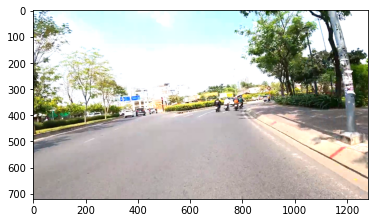

In [ ]:
img_pil = Image.open(join_string('IMG-', str(index[0]), '.jpg'))
enhancer = ImageEnhance.Brightness(img_pil)

factor = 1.5 #brightens the image
brightness = enhancer.enhance(factor)
plt.imshow(brightness)
# img_new = img_new.save(join_string('IMG-', str(index[0] + increase), '.jpg'))


###Compare

Text(0.5, 1.0, 'Noise addition')

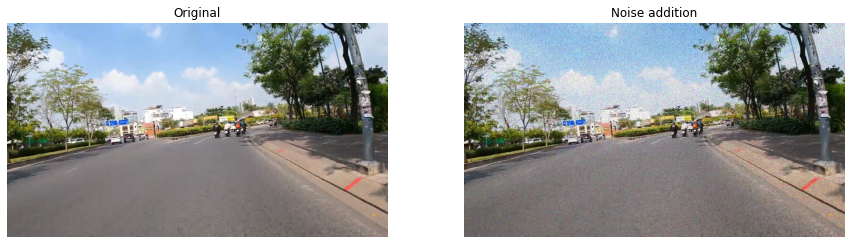

In [ ]:
# img_pil = Image.open('IMG-408.jpg')
img_opencv = cv2.imread('IMG-408.jpg')

gaussian_noise_ = add_gaussian_noise(img_opencv)

rows = 1
columns = 2

fig = plt.figure(figsize=(15, 12))

fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(cv2.cvtColor(img_opencv, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(gaussian_noise_)
plt.axis('off')
plt.title("Noise addition")

###Delete image

In [ ]:
cd('/content/drive/MyDrive/Traffic_Light')

In [ ]:
filenames = []
for x in os.listdir('Image_In_VN'):
  filenames.append(x)
# print(filenames)

root = '/content/drive/MyDrive/Traffic_Light/Image_In_VN/'

# string.remove('nb_')
# entries.remove('.ipynb_checkpoints')

for x in os.listdir('Image_In_VN'):
    print(x)
    if x == '.ipynb_checkpoints':
      del x
    else:
      condition = int(x[4: 7])
      if condition < 639:
        continue
      else:
        current_path = os.path.join(root, x)
        print(current_path)
        os.remove(current_path)
  # condition = x[4:7]
  
  # if  condition < 639:
  #   continue
  # else:
  #   current_path = os.path.join(root, x)
  #   print(current_path)
  
  #   os.remove(current_path)
  

IMG-408.jpg
IMG-409.jpg
IMG-410.jpg
IMG-411.jpg
IMG-412.jpg
IMG-413.jpg
IMG-414.jpg
IMG-415.jpg
IMG-416.jpg
IMG-417.jpg
IMG-418.jpg
IMG-419.jpg
IMG-420.jpg
IMG-421.jpg
IMG-422.jpg
IMG-423.jpg
IMG-424.jpg
IMG-425.jpg
IMG-426.jpg
IMG-427.jpg
IMG-428.jpg
IMG-429.jpg
IMG-430.jpg
IMG-431.jpg
IMG-432.jpg
IMG-433.jpg
IMG-434.jpg
IMG-435.jpg
IMG-436.jpg
IMG-437.jpg
IMG-438.jpg
IMG-439.jpg
IMG-440.jpg
IMG-441.jpg
IMG-442.jpg
IMG-443.jpg
IMG-444.jpg
IMG-445.jpg
IMG-446.jpg
IMG-447.jpg
IMG-448.jpg
IMG-449.jpg
IMG-450.jpg
IMG-451.jpg
IMG-452.jpg
IMG-453.jpg
IMG-454.jpg
IMG-456.jpg
IMG-457.jpg
IMG-458.jpg
IMG-459.jpg
IMG-460.jpg
IMG-461.jpg
IMG-462.jpg
IMG-463.jpg
IMG-464.jpg
IMG-465.jpg
IMG-466.jpg
IMG-467.jpg
IMG-468.jpg
IMG-469.jpg
IMG-470.jpg
IMG-471.jpg
IMG-473.jpg
IMG-474.jpg
IMG-475.jpg
IMG-476.jpg
IMG-477.jpg
IMG-478.jpg
IMG-479.jpg
IMG-480.jpg
IMG-481.jpg
IMG-482.jpg
IMG-483.jpg
IMG-484.jpg
IMG-485.jpg
IMG-486.jpg
IMG-487.jpg
IMG-488.jpg
IMG-489.jpg
IMG-490.jpg
IMG-491.jpg
IMG-492.jpg
IMG-

#Store Data

In [ ]:
images = [os.path.join('Images', x) for x in os.listdir('Images')]
annotations = [os.path.join('labels', x) for x in os.listdir('labels') if x[-3:] == "txt"]
img = []
for x in os.listdir('Images'):
  img.append(x)
print(img)

['IMG-001.jpg', 'IMG-002.jpg', 'IMG-003.jpg', 'IMG-004.jpg', 'IMG-005.jpg', 'IMG-006.jpg', 'IMG-007.jpg', 'IMG-008.jpg', 'IMG-009.jpg', 'IMG-010.jpg', 'IMG-011.jpg', 'IMG-012.jpg', 'IMG-013.jpg', 'IMG-014.jpg', 'IMG-015.jpg', 'IMG-016.jpg', 'IMG-017.jpg', 'IMG-018.jpg', 'IMG-019.jpg', 'IMG-020.jpg', 'IMG-021.jpg', 'IMG-022.jpg', 'IMG-023.jpg', 'IMG-024.jpg', 'IMG-025.jpg', 'IMG-026.jpg', 'IMG-027.jpg', 'IMG-028.jpg', 'IMG-029.jpg', 'IMG-030.jpg', 'IMG-031.jpg', 'IMG-032.jpg', 'IMG-033.jpg', 'IMG-034.jpg', 'IMG-035.jpg', 'IMG-036.jpg', 'IMG-037.jpg', 'IMG-038.jpg', 'IMG-039.jpg', 'IMG-040.jpg', 'IMG-041.jpg', 'IMG-042.jpg', 'IMG-043.jpg', 'IMG-044.jpg', 'IMG-045.jpg', 'IMG-046.jpg', 'IMG-047.jpg', 'IMG-048.jpg', 'IMG-049.jpg', 'IMG-050.jpg', 'IMG-051.jpg', 'IMG-052.jpg', 'IMG-053.jpg', 'IMG-054.jpg', 'IMG-055.jpg', 'IMG-056.jpg', 'IMG-057.jpg', 'IMG-058.jpg', 'IMG-059.jpg', 'IMG-060.jpg', 'IMG-061.jpg', 'IMG-062.jpg', 'IMG-063.jpg', 'IMG-064.jpg', 'IMG-065.jpg', 'IMG-066.jpg', 'IMG-067.

In [ ]:
print(annotations)

['labels/IMG144.txt', 'labels/IMG-001.txt', 'labels/IMG-002.txt', 'labels/IMG-003.txt', 'labels/IMG-004.txt', 'labels/IMG-005.txt', 'labels/IMG-006.txt', 'labels/IMG-007.txt', 'labels/IMG-008.txt', 'labels/IMG-009.txt', 'labels/IMG-010.txt', 'labels/IMG-011.txt', 'labels/IMG-012.txt', 'labels/IMG-013.txt', 'labels/IMG-014.txt', 'labels/IMG-015.txt', 'labels/IMG-016.txt', 'labels/IMG-017.txt', 'labels/IMG-018.txt', 'labels/IMG-019.txt', 'labels/IMG-020.txt', 'labels/IMG-021.txt', 'labels/IMG-022.txt', 'labels/IMG-026.txt', 'labels/IMG-025.txt', 'labels/IMG-024.txt', 'labels/IMG-023.txt', 'labels/IMG-027.txt', 'labels/IMG-028.txt', 'labels/IMG-029.txt', 'labels/IMG-030.txt', 'labels/IMG-031.txt', 'labels/IMG-032.txt', 'labels/IMG-033.txt', 'labels/IMG-034.txt', 'labels/IMG-035.txt', 'labels/IMG-036.txt', 'labels/IMG-037.txt', 'labels/IMG-038.txt', 'labels/IMG-039.txt', 'labels/IMG-040.txt', 'labels/IMG-041.txt', 'labels/IMG-042.txt', 'labels/IMG-043.txt', 'labels/IMG-044.txt', 'labels/IM

In [ ]:
# Path drive --> images
cd('/content/drive/MyDrive/Traffic_Light/Images')

In [ ]:
arr = []

for file in glob.glob("*.jpg"):
    arr.append(file)

(720, 1280, 3)


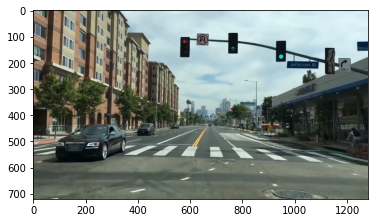

In [ ]:
img = cv2.imread(arr[10])

print(img.shape)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
arr_img = []
for i in range(0, len(arr)):
  img = cv2.imread(arr[i])
  arr_img.append(img)

In [ ]:
file_name = 'images.h'
with open(file_name, 'wb') as file:
  pickle.dump(arr_img, file)

In [ ]:
img_test = pickle.load(open('images.h', 'rb'))

In [ ]:
plt.imshow(img_test[100])

In [ ]:
# Path drive --> labels
cd('/content/drive/MyDrive/Traffic_Light/labels')

In [ ]:
ann = []
for file in glob.glob("*.txt"):
  ann.append(file)

In [ ]:
print(ann[10])

IMG-010.txt


##Pickle Dump


In [ ]:
!pwd

/content


In [ ]:
cd('/content')

In [ ]:
file_name1 = 'images.h'

with open (file_name1, 'wb') as file:
  pickle.dump(arr, file)


In [ ]:
file_name2 = 'labels.h'

with open(file_name2, 'wb') as file:
  pickle.dump(ann, file)

##Pickle Load


In [ ]:
!pwd

/content


In [ ]:
cd ..

/content


In [ ]:
images_ = pickle.load(open('images.h', 'rb'))
labels_ = pickle.load(open('labels.h', 'rb'))

In [ ]:
print(images_[10].type)

AttributeError: ignored

In [ ]:
print(arr)

['IMG-001.jpg', 'IMG-002.jpg', 'IMG-003.jpg', 'IMG-004.jpg', 'IMG-005.jpg', 'IMG-006.jpg', 'IMG-007.jpg', 'IMG-008.jpg', 'IMG-009.jpg', 'IMG-010.jpg', 'IMG-011.jpg', 'IMG-012.jpg', 'IMG-013.jpg', 'IMG-014.jpg', 'IMG-015.jpg', 'IMG-016.jpg', 'IMG-017.jpg', 'IMG-018.jpg', 'IMG-019.jpg', 'IMG-020.jpg', 'IMG-021.jpg', 'IMG-022.jpg', 'IMG-023.jpg', 'IMG-024.jpg', 'IMG-025.jpg', 'IMG-026.jpg', 'IMG-027.jpg', 'IMG-028.jpg', 'IMG-029.jpg', 'IMG-030.jpg', 'IMG-031.jpg', 'IMG-032.jpg', 'IMG-033.jpg', 'IMG-034.jpg', 'IMG-035.jpg', 'IMG-036.jpg', 'IMG-037.jpg', 'IMG-038.jpg', 'IMG-039.jpg', 'IMG-040.jpg', 'IMG-041.jpg', 'IMG-042.jpg', 'IMG-043.jpg', 'IMG-044.jpg', 'IMG-045.jpg', 'IMG-046.jpg', 'IMG-047.jpg', 'IMG-048.jpg', 'IMG-049.jpg', 'IMG-050.jpg', 'IMG-051.jpg', 'IMG-052.jpg', 'IMG-053.jpg', 'IMG-054.jpg', 'IMG-055.jpg', 'IMG-056.jpg', 'IMG-057.jpg', 'IMG-058.jpg', 'IMG-059.jpg', 'IMG-060.jpg', 'IMG-061.jpg', 'IMG-062.jpg', 'IMG-063.jpg', 'IMG-064.jpg', 'IMG-065.jpg', 'IMG-066.jpg', 'IMG-067.

In [ ]:
img_ = cv2.imread('long')

print(img_.shape)

AttributeError: ignored

In [ ]:
import os
  
# path
path = '/content/drive/MyDrive/Traffic_Light/Image_In_VN/IMG-408.jpg'
  
# Split the path in 
# root and ext pair
root_ext = os.path.splitext(path)
  
# print root and ext
# of the specified path
print("root part of '% s':" % path, root_ext[0])
print("ext part of '% s':" % path, root_ext[1], "\n")
  
  
# path
path = '/home/User/Desktop/'
  
# Split the path in 
# root and ext pair
root_ext = os.path.splitext(path)
  
# print root and ext
# of the specified path
print("root part of '% s':" % path, root_ext[0])
print("ext part of '% s':" % path, root_ext[1])

root part of '/content/drive/MyDrive/Traffic_Light/Image_In_VN/IMG-408.jpg': /content/drive/MyDrive/Traffic_Light/Image_In_VN/IMG-408
ext part of '/content/drive/MyDrive/Traffic_Light/Image_In_VN/IMG-408.jpg': .jpg 

root part of '/home/User/Desktop/': /home/User/Desktop/
ext part of '/home/User/Desktop/': 
